<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Explore data



In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


In [ ]:
#count NaN
df.isna().sum()

# Clear data

In [ ]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

In [ ]:
#count the class results
df['diagnosis'].value_counts()


In [ ]:
#replace data M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

In [ ]:
#drop the diagnosis(Diagnosis is our class label and store it in  'y')
y = df.diagnosis
X = df.drop('diagnosis', axis = 1)
X.head()

# Explore relations

In [ ]:
#first 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X- X.mean())/X.std()).iloc[:,0:15]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data= data)
plt.xticks(rotation=90)


In [ ]:
#last 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X-X.mean())/X.std()).iloc[:,15:31]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

In [ ]:
#find correlation between diagnosis and attributes
df.corr()['diagnosis'].sort_values()

In [ ]:
#find correlation between attributes
#correlation heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1:31].corr(), annot = True, linewidths = 1, cmap='Blues')

In [12]:
#drop correlated columns

x_v1 = X.drop(['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst','texture_worst', 'concavity_mean','perimeter_se', 'area_se', 'concave points_worst' ], axis= 1)

x_v1.shape

(569, 20)

<Axes: >

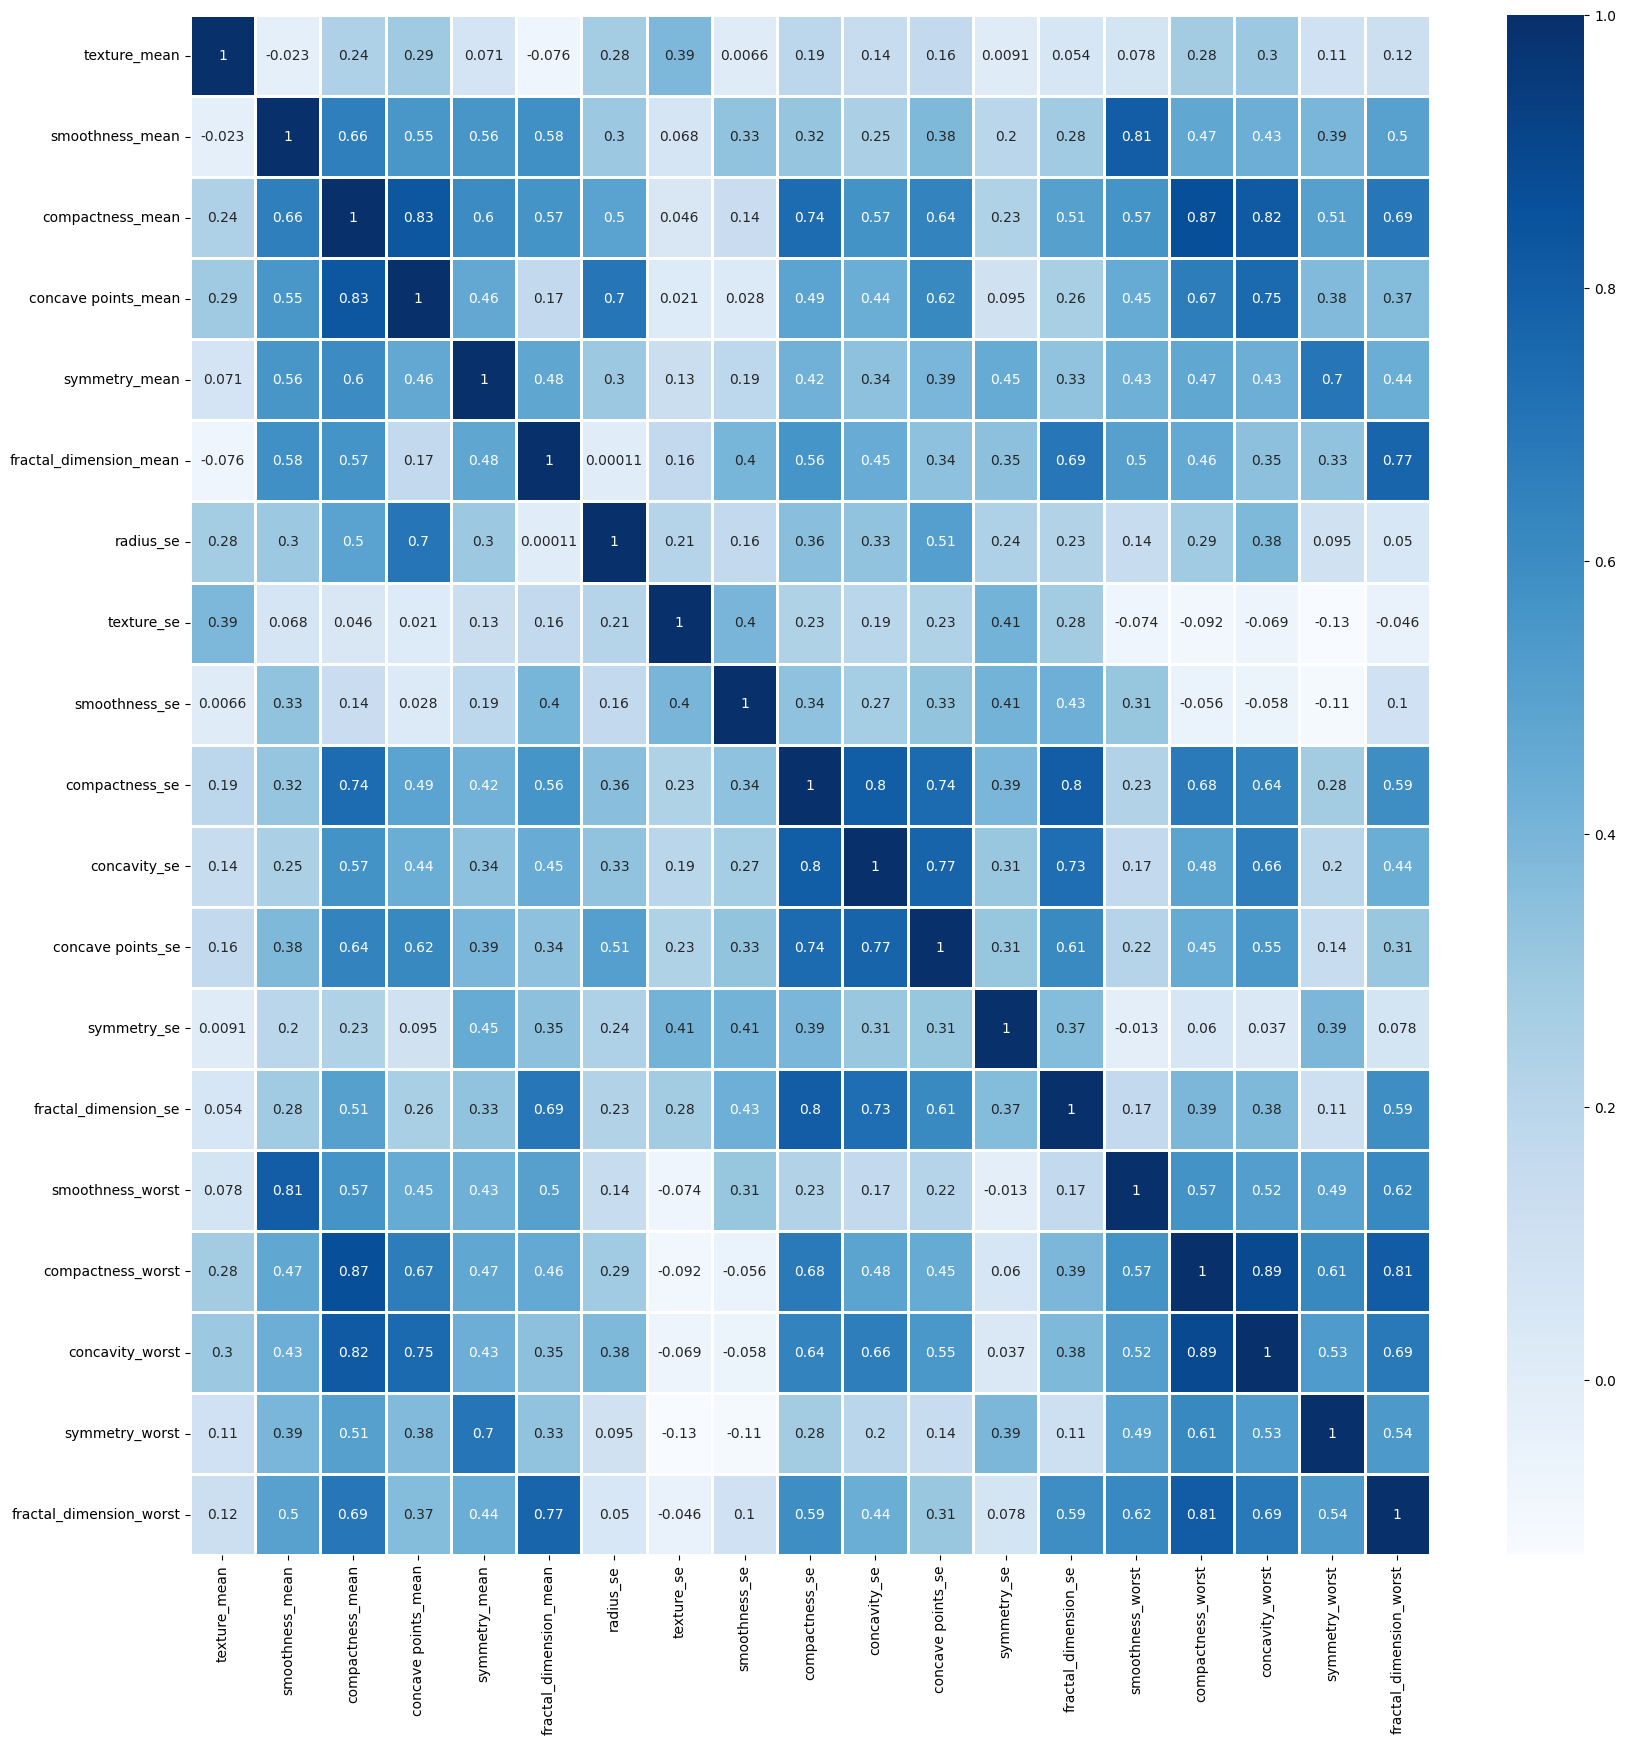

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(x_v1.iloc[:, 1:21].corr(), annot = True, linewidths = 1, cmap= 'Blues')

In [ ]:
#drop 0.80 korrelated and above
x_v2 = x_v1.drop(['compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean'], axis= 1)

x_v2.shape
x_v2.info()

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(x_v2.iloc[:, 1:15].corr(), annot = True, linewidths = 1, cmap= 'Blues')

#Test w DecisionTree

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
feature_cols1= ['radius_mean','texture_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','compactness_worst','symmetry_worst','compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean']
feature_cols2 = ['radius_mean','texture_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','compactness_worst','symmetry_worst']
X1= df[feature_cols1]
X2= df[feature_cols2]
y = df.diagnosis

Accuracy:  0.8947368421052632


Text(0.5, 1.0, 'Confusion Matrix for first data')

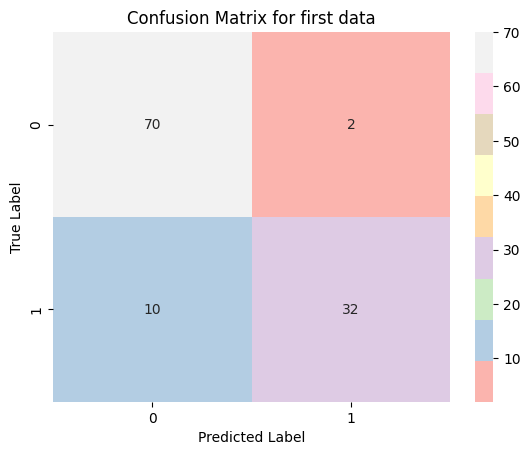

In [26]:
#split first data
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size= 0.2, random_state = 1)

clf1= DecisionTreeClassifier(criterion = "entropy", max_depth=6)
clf1= clf1.fit(X_train, y_train)
y_predict= clf1.predict(X_test)
accuracy1 = metrics.accuracy_score(y_test, y_predict)

print('Accuracy: ', accuracy1)
confusion_m1 = confusion_matrix(y_test, clf1.predict(X_test))
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for first data")

Accuracy:  0.9298245614035088


Text(0.5, 1.0, 'Confusion Matrix for second data')

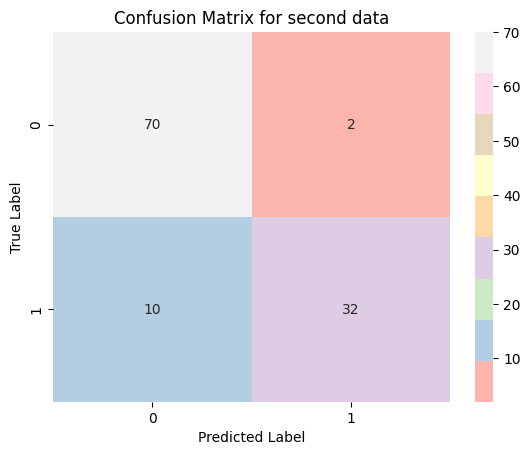

In [27]:
#split second data
X_train, X_test, y_train, y_test= train_test_split(X2, y, test_size= 0.2, random_state = 1)
#Decission Tree Classifier
clf2 = DecisionTreeClassifier(criterion= "entropy", max_depth=6)

clf2= clf2.fit(X_train, y_train)
y_predict= clf2.predict(X_test)
accuracy2 = metrics.accuracy_score(y_test, y_predict)

print('Accuracy: ', accuracy2)
confusion_m2 = confusion_matrix(y_test, clf2.predict(X_test))
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for second data")

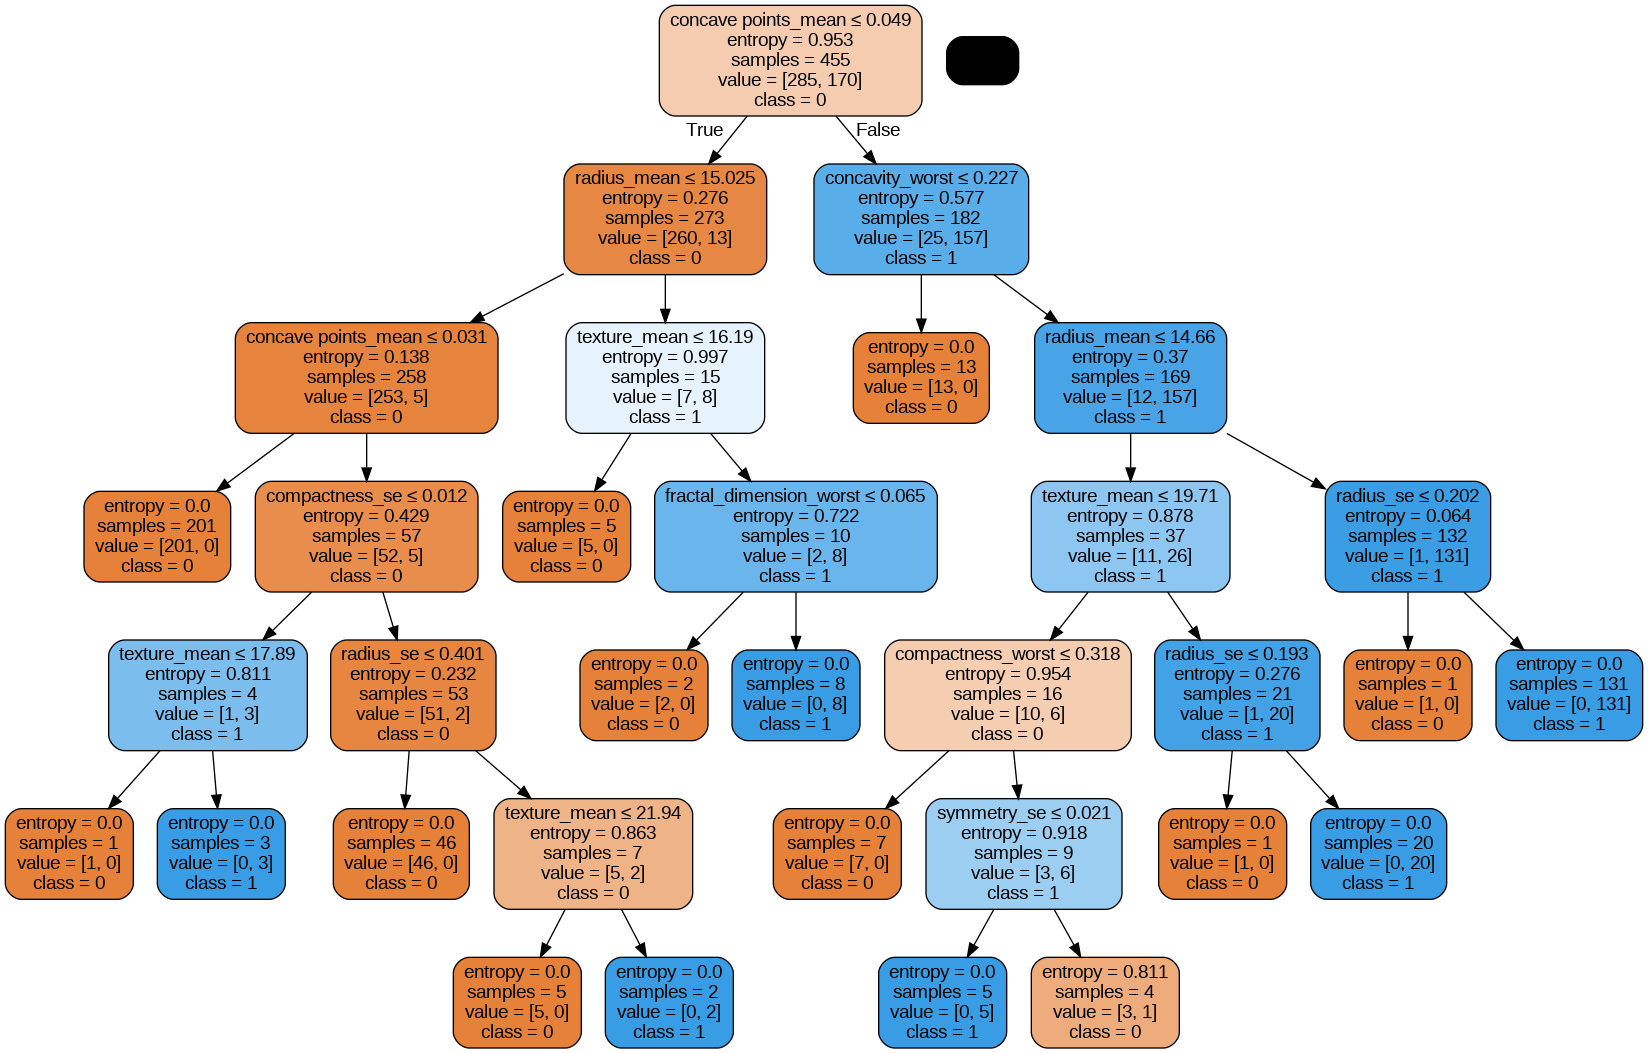

In [28]:
#visualize first desicion tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols1, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())


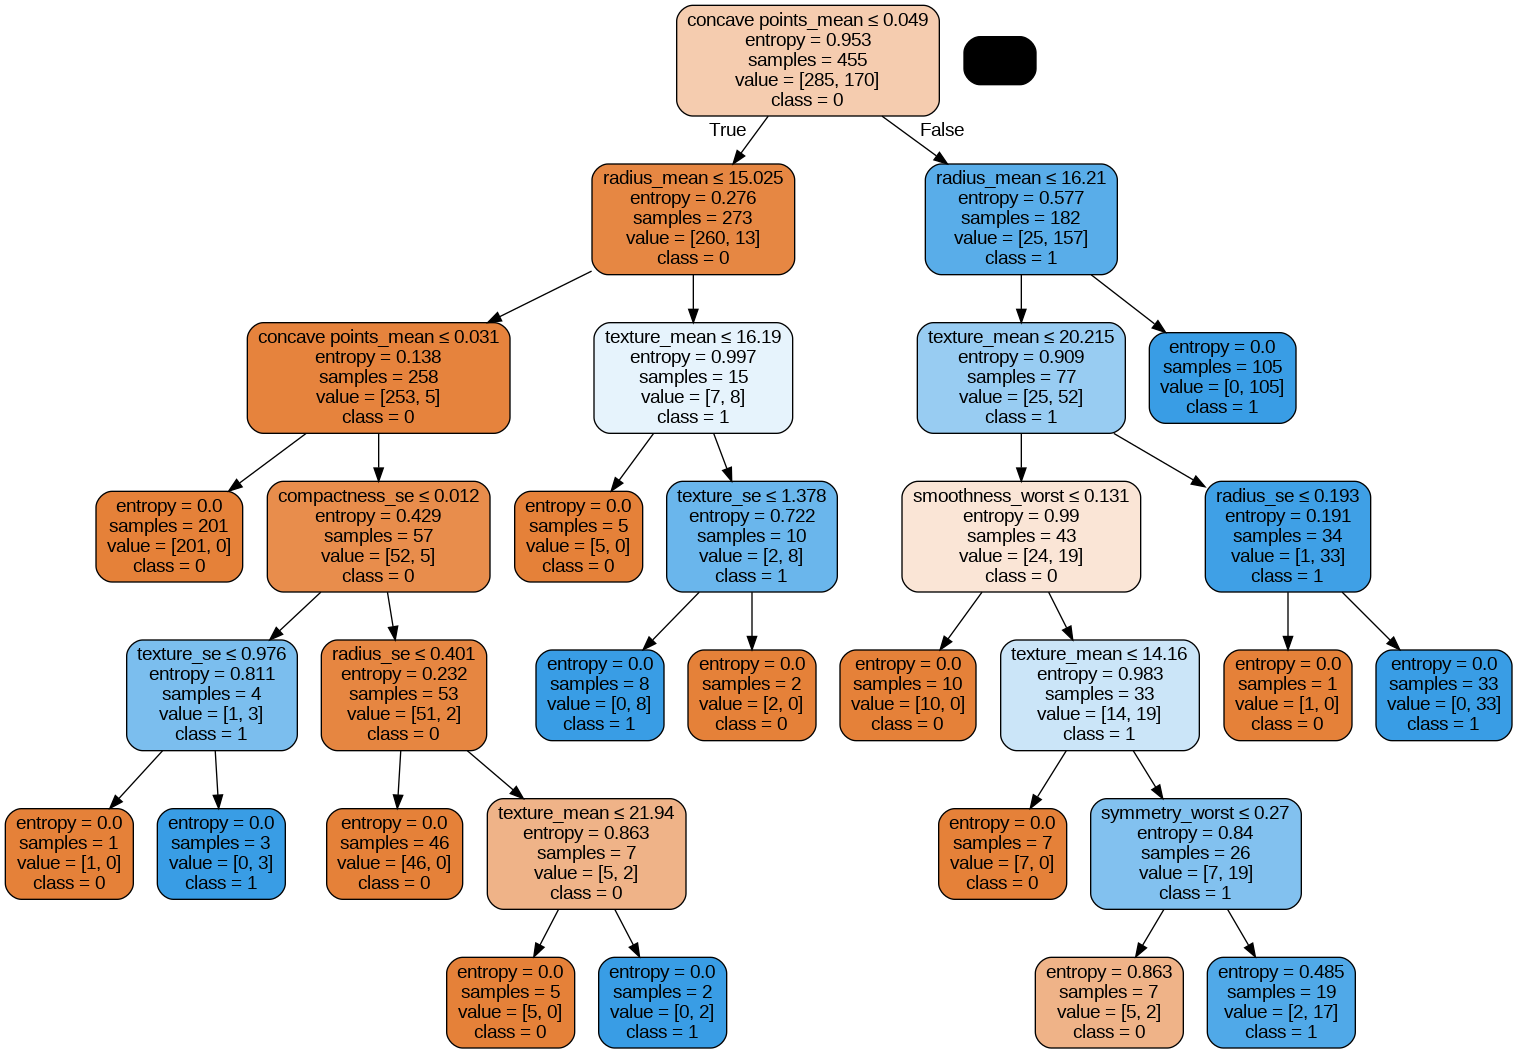

In [29]:
#visualize second decision tree

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols2, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())


Use random forrest on data v1


Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


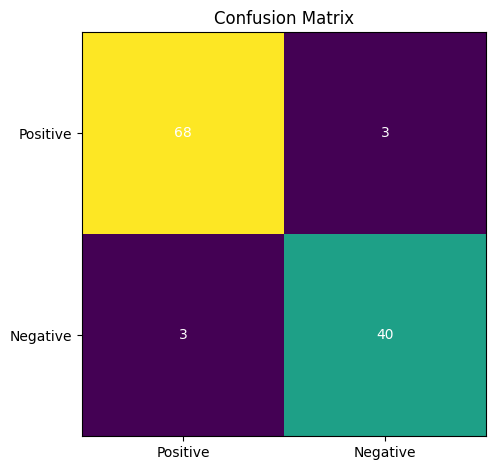

In [ ]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v1, y, test_size= 0.2, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))

#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()



print(confusion_m)
plt.show()



Use random forrest on data v2

In [ ]:
#split data
x_train, x_test, y_train, y_test= train_test_split(x_v2, y, test_size= 0.2, random_state=None)
#use Random Forest Classifier
rf_classifier= RandomForestClassifier(random_state=None)
rf_classifier= rf_classifier.fit(x_train, y_train)
#calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, rf_classifier.predict(x_test))
print('Accuracy: ' +str(accuracy))
confusion_m = confusion_matrix(y_test, rf_classifier.predict(x_test))


#visualize results
fig, ax = plt.subplots()
list_pos=['Positive', 'Negative']
list_ne =['Positive', 'Negative']
im = ax.imshow(confusion_m)
ax.set_xticks(np.arange(len(list_pos)),labels=list_pos)
ax.set_yticks(np.arange(len(list_ne)),labels=list_ne)
plt.setp(ax.get_xticklabels(), rotation=0)

for i in range(len(list_pos)):
  for j in range(len(list_ne)):
    text= ax.text(j,i,confusion_m[i, j], ha='center', va='center', color='w')

ax.set_title('Confusion Matrix')
fig.tight_layout()
print(confusion_m)
plt.show()



# Test w Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x1_train, x1_test, y1_train, y1_test= train_test_split(x_v1, y, test_size= 0.2, random_state=None)
x1_train= scaler.fit_transform(x1_train)
x1_test= scaler.transform(x1_test)

x2_train, x2_test, y2_train, y2_test= train_test_split(x_v2, y, test_size= 0.2, random_state=None)
x2_train=scaler.fit_transform(x2_train)
x2_test= scaler.transform(x2_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)
lr2= LogisticRegression()
lr2.fit(x2_train, y2_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
print('Accuracy for first train data: ' , accuracy_score(y1_train, lr1.predict(x1_train)))
print('Accuracy for first test data: ', accuracy_score(y1_test, lr1.predict(x1_test)))

print('\nAccuracy for second train data: ', accuracy_score(y2_train, lr2.predict(x2_train)))
print('Accuracy for second test data: ', accuracy_score(y2_test, lr2.predict(x2_test)))

Accuracy for first train data:  0.9868131868131869
Accuracy for first test data:  0.9649122807017544

Accuracy for second train data:  0.9736263736263736
Accuracy for second test data:  0.9824561403508771
